In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [34]:
df = pd.read_csv('data/student_performance.csv')
pd.set_option('display.max_columns', None)
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4


In [35]:
# Changing categorical variable Air Quality to numeric 0-3 with 0 being Hazardous and 3 being Good quality air in order to map correlations to other variables
df['GradeClass'] = df['GradeClass'].map({4.0 : 'F', 3.0 : 'D', 2.0 : 'C', 1.0 : 'B', 0.0 : 'A'})

In [36]:
df['GradeClass'] = df['GradeClass'].map({'F' : 0, 'D' : 1, 'C' : 2, 'B' : 3, 'A' : 4})
df['Ethnicity'] = df['Ethnicity'].map({0 : 'Caucasian', 1 : 'African American', 2 : 'Asian', 3 : 'Other'})
df['Gender'] = df['Gender'].map({0 : 'Male', 1 : 'Female'})

In [37]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,Female,Caucasian,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,Male,Caucasian,1,15.408756,0,0,1,0,0,0,0,3.042915,3
2,15,Male,Asian,3,4.210570,26,0,2,0,0,0,0,0.112602,0
3,17,Female,Caucasian,3,10.028829,14,0,3,1,0,0,0,2.054218,1
4,17,Female,Caucasian,2,4.672495,17,1,3,0,0,0,0,1.288061,0


In [6]:
df['GradeClass'].value_counts()

GradeClass
0    1211
1     414
2     391
3     269
4     107
Name: count, dtype: int64

In [7]:
df['GradeClass'].value_counts(normalize = True)

GradeClass
0    0.506271
1    0.173077
2    0.163462
3    0.112458
4    0.044732
Name: proportion, dtype: float64

In [8]:
df.dtypes

Age                    int64
Gender                object
Ethnicity             object
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
GradeClass             int64
dtype: object

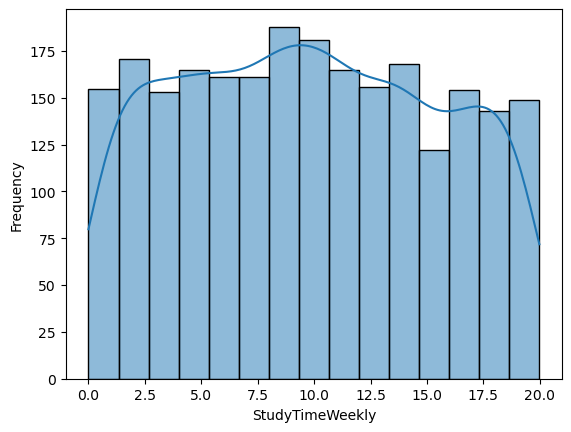

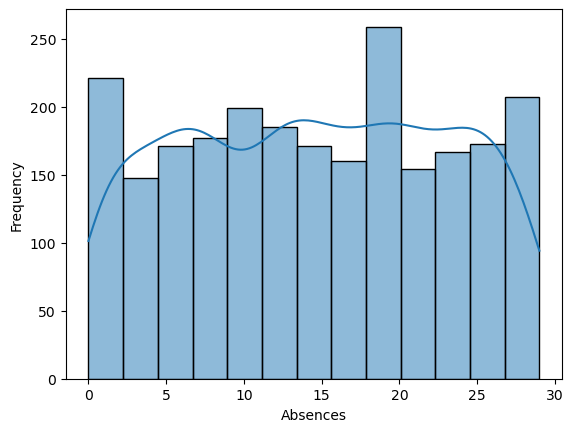

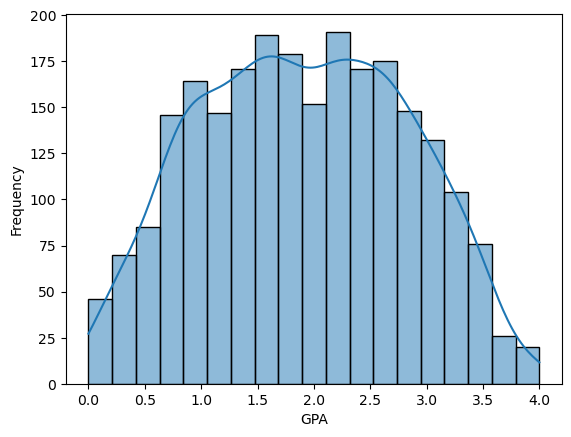

In [9]:
for column in df[['StudyTimeWeekly', 'Absences', 'GPA']]:
    sns.histplot(df[column], kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

>> Examining the above distribution of each variable in the data set, the following show a somewhat normal distribution: temperature, humidity, NO2, and Population_Density. The other variables show varied skewness and would not be considered normally distributed

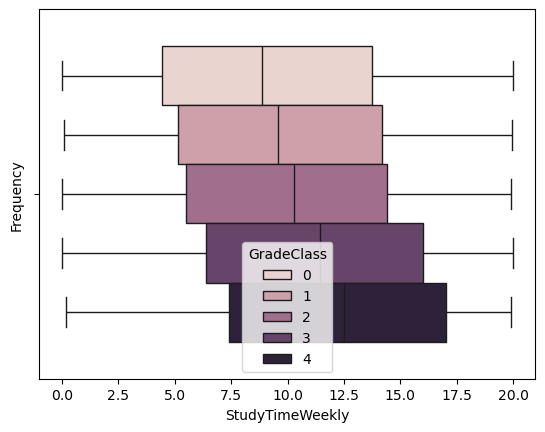

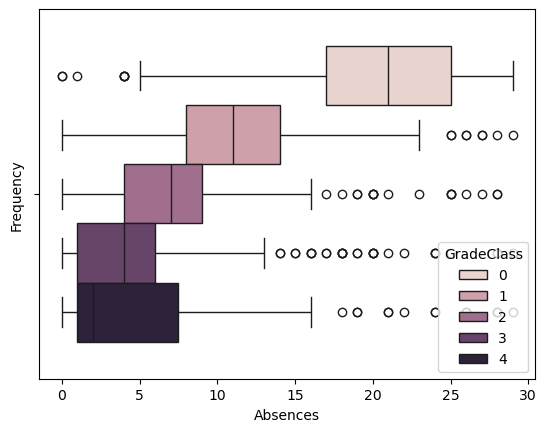

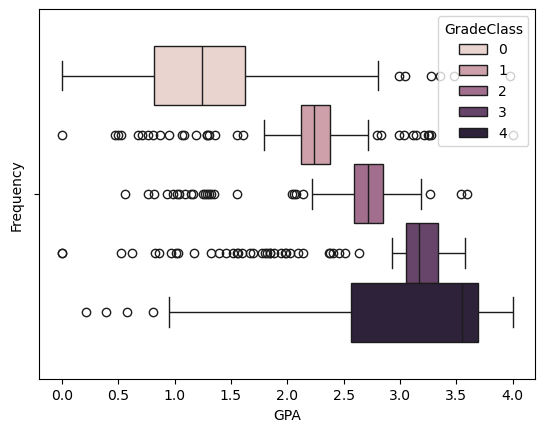

In [10]:
for column in df[['StudyTimeWeekly', 'Absences', 'GPA']]:
    sns.boxplot(df, x = df[column], hue = 'GradeClass', legend = 'brief')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

>> Boxplots above show distributions that you could infer from each type of air quality. Areas with hazardous/poor conditions would tend to have higher average temperature, humidity, population density, concentrations levels of dangerous particulate matter and chemicals, and closer proximity to industrial areas. These plots show that our data is accurately categorized and is ready for testing and modelling.

In [11]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,Female,Caucasian,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,Male,Caucasian,1,15.408756,0,0,1,0,0,0,0,3.042915,3
2,15,Male,Asian,3,4.210570,26,0,2,0,0,0,0,0.112602,0
3,17,Female,Caucasian,3,10.028829,14,0,3,1,0,0,0,2.054218,1
4,17,Female,Caucasian,2,4.672495,17,1,3,0,0,0,0,1.288061,0


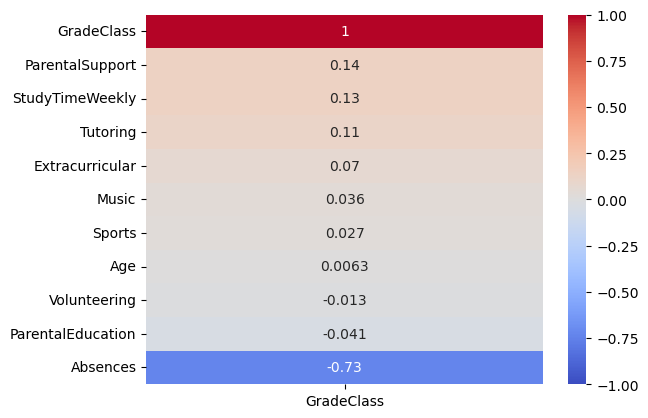

In [12]:
sns.heatmap(df.loc[:, df.columns.drop(['GPA'])].corr(numeric_only = True)[['GradeClass']].sort_values(by = 'GradeClass', ascending = False),
            vmin = -1,
            vmax = 1,
            annot = True,
            cmap = 'coolwarm'
           );

In [39]:
df['GradeClass'] = df['GradeClass'].map({0 : 'F', 1 : 'D', 2 : 'C', 3 : 'B', 4 : 'A'})

In [40]:
df.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,Female,Caucasian,2,19.833723,7,1,2,0,0,1,0,2.929196,C
1,18,Male,Caucasian,1,15.408756,0,0,1,0,0,0,0,3.042915,B
2,15,Male,Asian,3,4.210570,26,0,2,0,0,0,0,0.112602,F
3,17,Female,Caucasian,3,10.028829,14,0,3,1,0,0,0,2.054218,D
4,17,Female,Caucasian,2,4.672495,17,1,3,0,0,0,0,1.288061,F


In [41]:
# Making a function to find the best value of k to use in my next function to obtain the best test score
def kFinder(d):

    X = df.drop(columns=['GradeClass', 'GPA', 'Age', 'Ethnicity', 'Gender'])
    y = df['GradeClass']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

    # Standardizing the features for KNN model
    sc = StandardScaler()

    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.transform(X_test)
    
    # Figuring out ideal value of k
    scores = []

    for k in range(3, 16, 2):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train_sc, np.ravel(y_train,order='C'))
        train_score = knn.score(X_train_sc, y_train)
        test_score = knn.score(X_test_sc, y_test)
        
        scores.append({'k': k, 'train_score': train_score, 'test_score': test_score})
        
    df_score = pd.DataFrame(scores)
    max_index = df_score['test_score'].idxmax()
    best_k = int(df_score.loc[max_index][0])
    
    return best_k


In [42]:
# Function that takes value of k from kFinder function to give most ideal test score
def KNN(d):
    
    X = df.drop(columns=['GradeClass', 'GPA', 'Age', 'Ethnicity', 'Gender'])
    y = df['GradeClass']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

    # Standardizing the features for KNN model
    sc = StandardScaler()

    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors = kFinder(df))

    # Fit
    knn.fit(X_train_sc, np.ravel(y_train, order='C'))

    # Print training and test accuracy scores
    print("Training Shape: ", X_train.shape)
    print("Test Shape: ", y_test.shape)
    print("Training Score: ", knn.score(X_train_sc, y_train))
    print("Test Score: ", knn.score(X_test_sc, y_test))
    print("\nBaseline Model: \n", y_test.value_counts(normalize = True))

    # Print classification report
    y_pred = knn.predict(X_test_sc)
    print("\nClassification Scores: ")
    print("\n", classification_report(y_pred, y_test))

    # Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(knn, X_test_sc, y_test, cmap = 'Blues');

/var/folders/zn/ytwbz93d2t3fzfx2zxnxcszr0000gn/T/ipykernel_6963/1160810915.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_k = int(df_score.loc[max_index][0])


Training Shape:  (1913, 9)
Test Shape:  (479,)
Training Score:  0.7219027705175117
Test Score:  0.6388308977035491

Baseline Model: 
 GradeClass
F    0.507307
D    0.173278
C    0.162839
B    0.112735
A    0.043841
Name: proportion, dtype: float64

Classification Scores: 

               precision    recall  f1-score   support

           A       0.14      0.38      0.21         8
           B       0.31      0.41      0.36        41
           C       0.49      0.43      0.46        89
           D       0.34      0.38      0.36        73
           F       0.91      0.82      0.86       268

    accuracy                           0.64       479
   macro avg       0.44      0.48      0.45       479
weighted avg       0.68      0.64      0.66       479



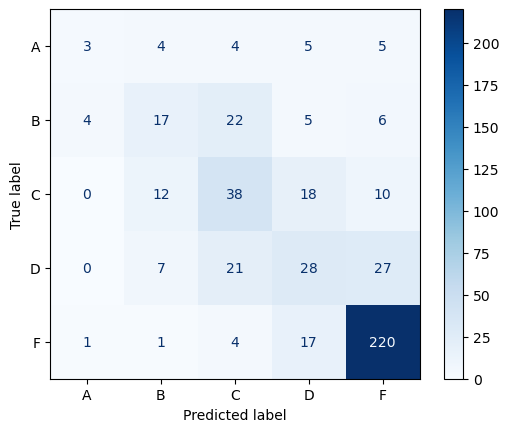

In [17]:
KNN(df)

In [43]:
# Function to help visualize how each value of k scores for KNN model and where the best value of k is from 3 to 16 (more than 16 neighbors would cause too much noise)
def kVizualizer(d):
    
    X = df.drop(columns=['GradeClass', 'GPA', 'Age', 'Ethnicity', 'Gender'])
    y = df['GradeClass']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

    # Standardizing the features for KNN model
    sc = StandardScaler()

    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.transform(X_test)
    
    # Figuring out ideal value of k
    scores = []

    for k in range(3, 16, 2):
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train_sc, np.ravel(y_train,order='C'))
        train_score = knn.score(X_train_sc, y_train)
        test_score = knn.score(X_test_sc, y_test)
        
        scores.append({'k': k, 'train_score': train_score, 'test_score': test_score})
        
    df_score = pd.DataFrame(scores)

    # Visualize this:
    sns.lineplot(data = df_score, x = 'k', y = 'train_score', c = 'navy', label = 'Train');
    sns.lineplot(data = df_score, x = 'k', y = 'test_score', c = 'orange', label = 'Test');
    plt.ylabel('Scores');
    plt.xticks(range(3, 16, 2));

    return df_score
    

,k,train_score,test_score
0,3,0.766858,0.557411
1,5,0.759017,0.607516
2,7,0.722426,0.624217
3,9,0.721903,0.638831
4,11,0.708312,0.617954
5,13,0.700993,0.609603
6,15,0.688447,0.613779


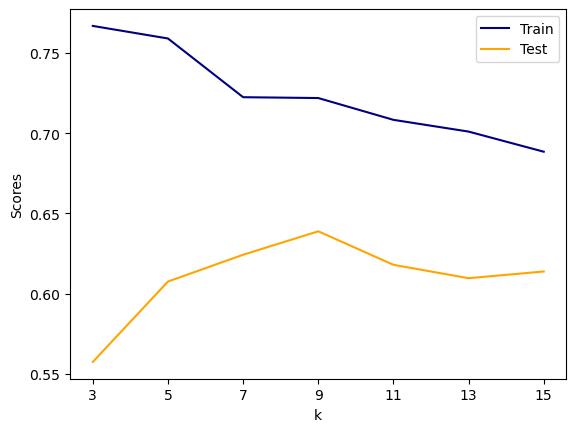

In [19]:
kVizualizer(df)

In [44]:
from sklearn.linear_model import LogisticRegression

# Function to generate a logistic regression model and confusion matrix showcasing results put into one cell for simplicity
def Logistic(d):

    X = df.drop(columns=['GradeClass', 'GPA', 'Age', 'Ethnicity', 'Gender'])
    y = df['GradeClass']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
    
    # Standardizing the features for KNN model
    sc = StandardScaler()
    
    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.transform(X_test)

    logr = LogisticRegression()
    logr.fit(X_train_sc, np.ravel(y_train,order='C'))

    # Print training and test accuracy scores
    print("Training Shape: ", X_train.shape)
    print("Test Shape: ", y_test.shape)
    print("Training Score: ", logr.score(X_train_sc, y_train))
    print("Test Score: ", logr.score(X_test_sc, y_test))
    print("\nBaseline: \n", y_test.value_counts(normalize = True))

    # Print classification report
    y_pred = logr.predict(X_test_sc)
    print("\nClassification Scores: ")
    print("\n", classification_report(y_pred, y_test))

    # Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(logr, X_test_sc, y_test, cmap = 'Greens');

Training Shape:  (1913, 9)
Test Shape:  (479,)
Training Score:  0.7407213800313643
Test Score:  0.7390396659707724

Baseline: 
 GradeClass
F    0.507307
D    0.173278
C    0.162839
B    0.112735
A    0.043841
Name: proportion, dtype: float64

Classification Scores: 

               precision    recall  f1-score   support

           A       0.24      0.83      0.37         6
           B       0.52      0.64      0.57        44
           C       0.69      0.50      0.58       109
           D       0.45      0.60      0.51        62
           F       0.95      0.89      0.92       258

    accuracy                           0.74       479
   macro avg       0.57      0.69      0.59       479
weighted avg       0.78      0.74      0.75       479



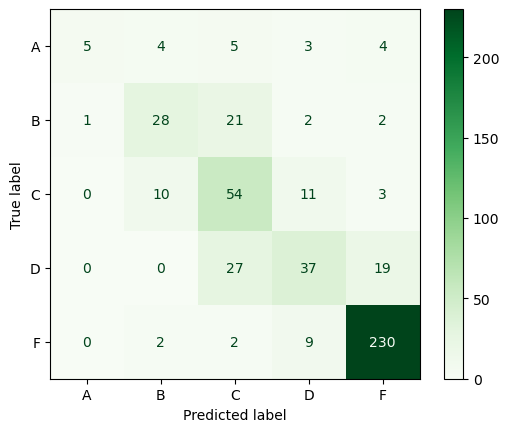

In [21]:
Logistic(df)

In [45]:
from sklearn.ensemble import RandomForestClassifier
# Function to generate a random forest model and confusion matrix showcasing results put into one cell for simplicity
def RandomForest(d):

    X = df.drop(columns=['GradeClass', 'GPA', 'Age', 'Ethnicity', 'Gender'])
    y = df['GradeClass']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
    
    # Standardizing the features for KNN model
    sc = StandardScaler()
    
    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.transform(X_test)

    rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
    rf.fit(X_train_sc, np.ravel(y_train,order='C'))

    # Print training and test accuracy scores
    print("Training Shape: ", X_train.shape)
    print("Test Shape: ", y_test.shape)
    print("Training Score: ", rf.score(X_train_sc, y_train))
    print("Test Score: ", rf.score(X_test_sc, y_test))
    print("\nBaseline: \n", y_test.value_counts(normalize = True))

    # Print classification report
    y_pred = rf.predict(X_test_sc)
    print("\nClassification Scores: ")
    print("\n", classification_report(y_pred, y_test))

    # Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(rf, X_test_sc, y_test, cmap = 'Purples');

Training Shape:  (1913, 9)
Test Shape:  (479,)
Training Score:  0.9994772608468374
Test Score:  0.7202505219206681

Baseline: 
 GradeClass
F    0.507307
D    0.173278
C    0.162839
B    0.112735
A    0.043841
Name: proportion, dtype: float64

Classification Scores: 

               precision    recall  f1-score   support

           A       0.19      0.50      0.28         8
           B       0.57      0.55      0.56        56
           C       0.60      0.55      0.57        86
           D       0.53      0.49      0.51        89
           F       0.90      0.91      0.91       240

    accuracy                           0.72       479
   macro avg       0.56      0.60      0.57       479
weighted avg       0.73      0.72      0.72       479



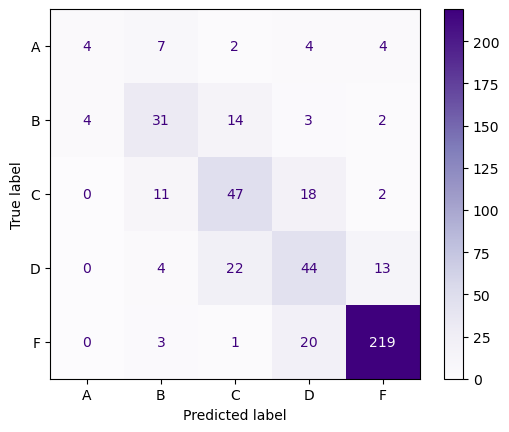

In [23]:
RandomForest(df)

In [24]:
# Dictionary to store outlier information for each column
outlier_info = {}
def find_outliers(d):
    # Iterate through each numeric column in the DataFrame
    for column in d.loc[:, d.columns.drop(['GradeClass', 'Ethnicity', 'Gender'])]:
        Q1 = d[column].quantile(0.25)
        Q3 = d[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count the number of outliers
        outlier_count = ((d[column] < lower_bound) | (d[column] > upper_bound)).sum()
        outlier_percentage = (outlier_count / len(d)) * 100
        
        # Store the information in the dictionary
        outlier_info[column] = {'Count': outlier_count, 'Percentage': outlier_percentage}
    
    # Convert the dictionary to a DataFrame for better visualization
    outlier_df = pd.DataFrame(outlier_info).T
    outlier_df = outlier_df.sort_values(by='Percentage', ascending=False)

    return outlier_df

In [25]:
print("Outlier information for each numerical column (ordered by percentage):")
find_outliers(df)

Outlier information for each numerical column (ordered by percentage):


,Count,Percentage
Music,471.0,19.690635
Volunteering,376.0,15.719064
ParentalEducation,120.0,5.016722
Age,0.0,0.000000
StudyTimeWeekly,0.0,0.000000
Absences,0.0,0.000000
Tutoring,0.0,0.000000
ParentalSupport,0.0,0.000000
Extracurricular,0.0,0.000000
Sports,0.0,0.000000


In [46]:
# Function to remove outliers from given data frame to hopefully obtain more accurate model results
def remove_outliers_iqr(d):
    
    for col in d.loc[:, d.columns.drop(['GradeClass', 'Ethnicity', 'Gender'])]:
        Q1 = d[col].quantile(0.25)  # First quartile (25%)
        Q3 = d[col].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile range (IQR)

        # Define the bounds for non-outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the data to keep only non-outliers
        d = d[(d[col] >= lower_bound) & (d[col] <= upper_bound)]

    return d

# Apply the function
df_cleaned = remove_outliers_iqr(df)
df_cleaned.to_csv('data/cleaned_data.csv', index = False)

# Check the sizes of the cleaned DataFrames
print("Original Shape:", df.shape)
print("New Shape:", df_cleaned.shape)

Original Shape: (2392, 14)
New Shape: (1552, 14)


In [27]:
df2 = pd.read_csv('data/cleaned_data.csv')
df2.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,18,Male,Caucasian,1,15.408756,0,0,1,0,0,0,0,3.042915,B
1,15,Male,Asian,3,4.210570,26,0,2,0,0,0,0,0.112602,F
2,17,Female,Caucasian,3,10.028829,14,0,3,1,0,0,0,2.054218,D
3,17,Female,Caucasian,2,4.672495,17,1,3,0,0,0,0,1.288061,F
4,18,Male,Caucasian,1,8.191219,0,0,1,1,0,0,0,3.084184,B


In [28]:
df2['GradeClass'].value_counts()

GradeClass
F    777
C    267
D    266
B    167
A     75
Name: count, dtype: int64

In [29]:
df2['GradeClass'].value_counts(normalize = True)

GradeClass
F    0.500644
C    0.172036
D    0.171392
B    0.107603
A    0.048325
Name: proportion, dtype: float64

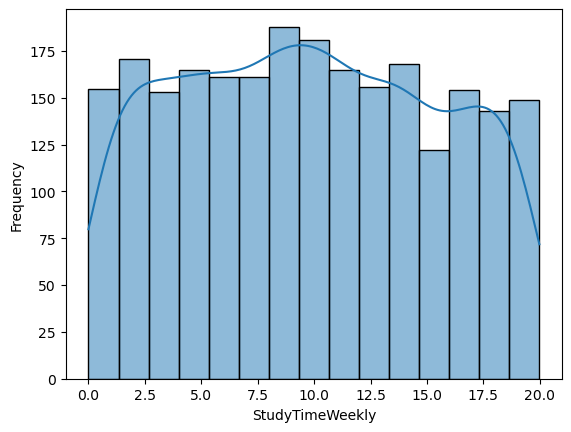

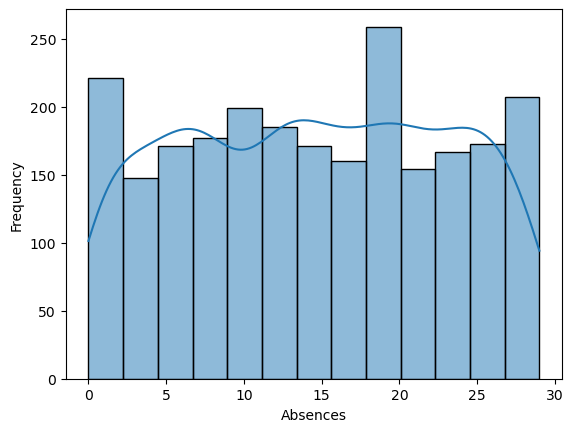

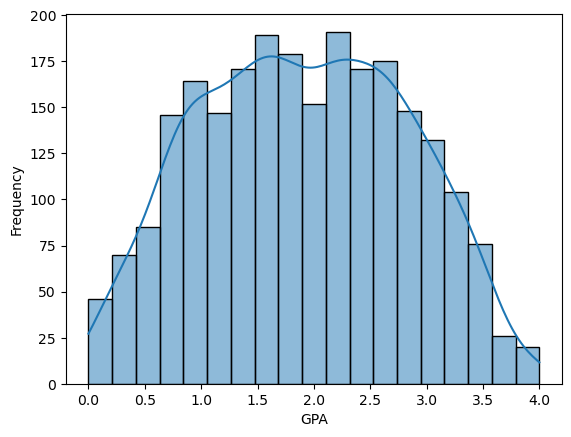

In [30]:
for column in df2[['StudyTimeWeekly', 'Absences', 'GPA']]:
    sns.histplot(df[column], kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

/var/folders/zn/ytwbz93d2t3fzfx2zxnxcszr0000gn/T/ipykernel_6963/1160810915.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_k = int(df_score.loc[max_index][0])


Training Shape:  (1913, 9)
Test Shape:  (479,)
Training Score:  0.7219027705175117
Test Score:  0.6388308977035491

Baseline Model: 
 GradeClass
F    0.507307
D    0.173278
C    0.162839
B    0.112735
A    0.043841
Name: proportion, dtype: float64

Classification Scores: 

               precision    recall  f1-score   support

           A       0.14      0.38      0.21         8
           B       0.31      0.41      0.36        41
           C       0.49      0.43      0.46        89
           D       0.34      0.38      0.36        73
           F       0.91      0.82      0.86       268

    accuracy                           0.64       479
   macro avg       0.44      0.48      0.45       479
weighted avg       0.68      0.64      0.66       479



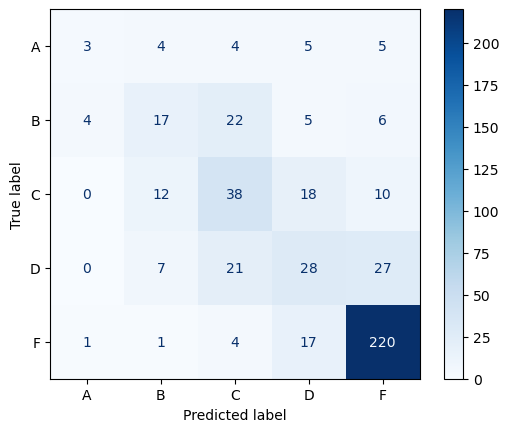

In [31]:
KNN(df2)

Training Shape:  (1913, 9)
Test Shape:  (479,)
Training Score:  0.7407213800313643
Test Score:  0.7390396659707724

Baseline: 
 GradeClass
F    0.507307
D    0.173278
C    0.162839
B    0.112735
A    0.043841
Name: proportion, dtype: float64

Classification Scores: 

               precision    recall  f1-score   support

           A       0.24      0.83      0.37         6
           B       0.52      0.64      0.57        44
           C       0.69      0.50      0.58       109
           D       0.45      0.60      0.51        62
           F       0.95      0.89      0.92       258

    accuracy                           0.74       479
   macro avg       0.57      0.69      0.59       479
weighted avg       0.78      0.74      0.75       479



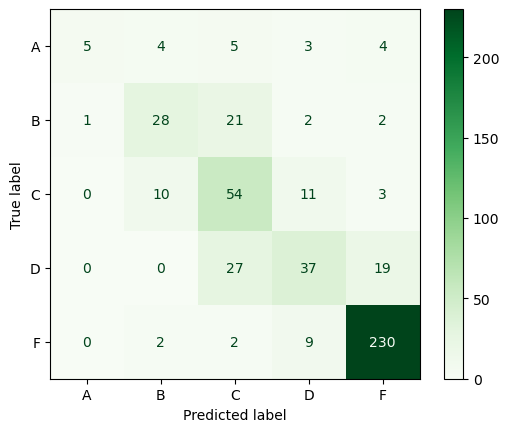

In [32]:
Logistic(df2)

Training Shape:  (1913, 9)
Test Shape:  (479,)
Training Score:  0.9994772608468374
Test Score:  0.7202505219206681

Baseline: 
 GradeClass
F    0.507307
D    0.173278
C    0.162839
B    0.112735
A    0.043841
Name: proportion, dtype: float64

Classification Scores: 

               precision    recall  f1-score   support

           A       0.19      0.50      0.28         8
           B       0.57      0.55      0.56        56
           C       0.60      0.55      0.57        86
           D       0.53      0.49      0.51        89
           F       0.90      0.91      0.91       240

    accuracy                           0.72       479
   macro avg       0.56      0.60      0.57       479
weighted avg       0.73      0.72      0.72       479



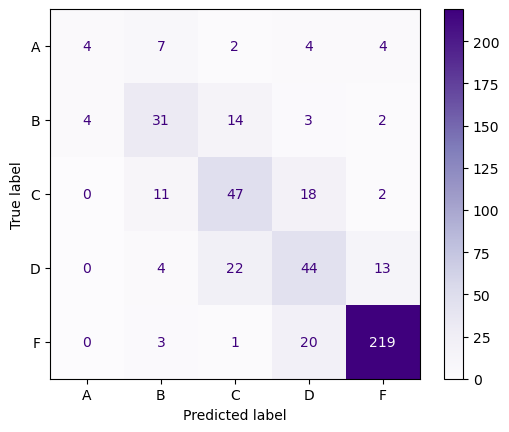

In [33]:
RandomForest(df2)